In [ ]:
Attribute Information:
1.	Age: Age
2.	Sex: Sex (1 = male; 0 = female)
1.	ChestPain: Chest pain (typical, asymptotic, nonanginal, nontypical)
3.	RestBP: Resting blood pressure
1.	Chol: Serum cholestoral in mg/dl
2.	Fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
3.	RestECG: Resting electrocardiographic results
4.	MaxHR: Maximum heart rate achieved
5.	ExAng: Exercise induced angina (1 = yes; 0 = no)
6.	Oldpeak: ST depression induced by exercise relative to rest
7.	Slope: Slope of the peak exercise ST segment
8.	Ca: Number of major vessels colored by flourosopy (0 - 3)
9.	Thal: (3 = normal; 6 = fixed defect; 7 = reversable defect)
10.	target: AHD - Diagnosis of heart disease (1 = yes; 0 = no)


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns


In [115]:
da=pd.read_csv("C:/Users/Akash/Downloads/heart (1).csv")

In [116]:
da

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [61]:
da.shape

(303, 14)

In [62]:
da.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [63]:
da_dup=da.duplicated().any()

In [64]:
da_dup

True

In [65]:
da=da.drop_duplicates()

In [66]:
da_dup=da.duplicated().any()

In [67]:
da_dup

False

In [68]:
# Data processing

In [69]:
cate_val=[]
cont_val=[]
for column in da.columns:
    if da[column].nunique()<=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [72]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [112]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [75]:
da['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

In [ ]:
#feature scaling

In [76]:
da.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [78]:
from sklearn.preprocessing import StandardScaler

In [81]:
st=StandardScaler()
da[cont_val]=st.fit_transform(da[cont_val])

C:\Users\Akash\Downloads\anaconda\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [82]:
da.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.949794,1,3,0.764066,-0.261285,1,0,0.018826,0,1.084022,0,0,1,1
1,-1.928548,1,2,-0.091401,0.067741,0,1,1.636979,0,2.118926,0,0,2,1
2,-1.485726,0,1,-0.091401,-0.822564,0,0,0.980971,0,0.307844,2,0,2,1
3,0.174856,1,1,-0.661712,-0.203222,0,1,1.243374,0,-0.209608,2,0,2,1
4,0.285561,0,0,-0.661712,2.080602,0,1,0.587366,1,-0.382092,2,0,2,1


<AxesSubplot:>

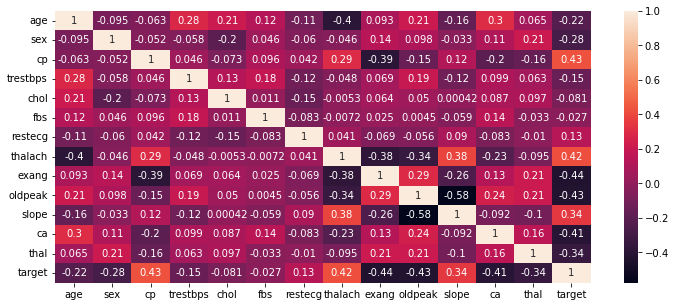

In [109]:
# heatmap


plt.figure(figsize=(12,5))
sns.heatmap(da.corr(),annot=True)

In [ ]:
#target variable and the  cp variable are the strong positive corelation  also the target variable 
#and the thalach has also positive correlation.

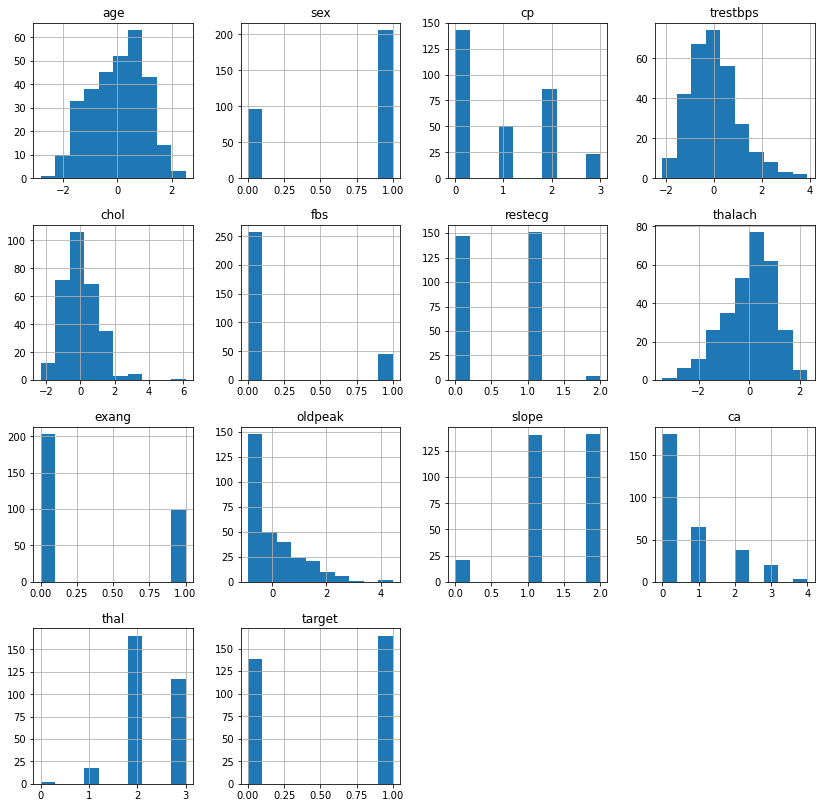

In [110]:
da.hist(figsize=(14,14))
plt.show()

In [ ]:
# 0 be the female amd 1 be the male 

<AxesSubplot:xlabel='sex', ylabel='count'>

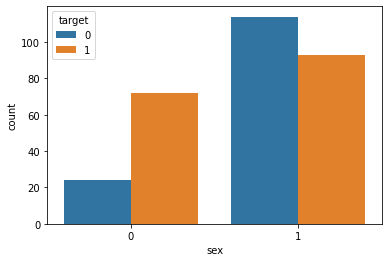

In [119]:
sns.countplot(x="sex",hue='target',data=da)

In [ ]:
#sex 0 be the female and 1 be the male 

<AxesSubplot:>

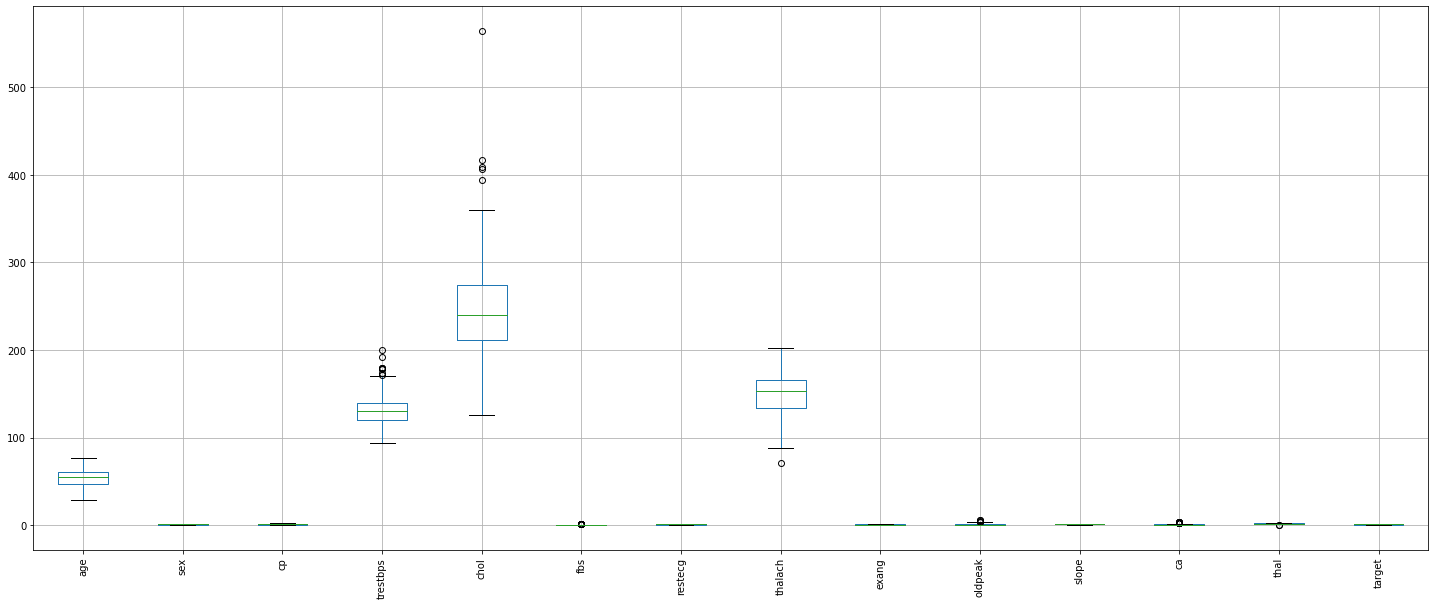

In [120]:
da.boxplot(rot=90,figsize=(25,10))

<AxesSubplot:>

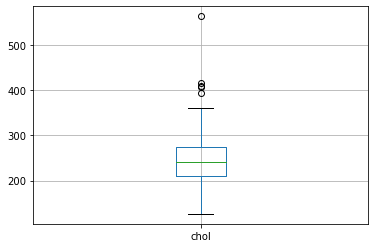

In [125]:
da.boxplot(column="chol")

In [126]:
da=da[da.chol<350]

<AxesSubplot:>

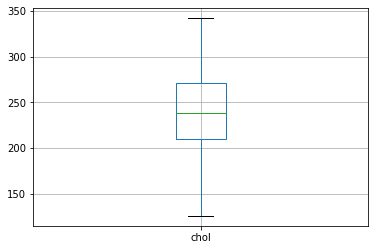

In [127]:
da.boxplot(column="chol")

<AxesSubplot:>

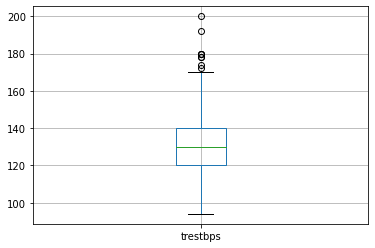

In [128]:
da.boxplot(column="trestbps")

In [129]:
da=da[da.trestbps<170]

<AxesSubplot:>

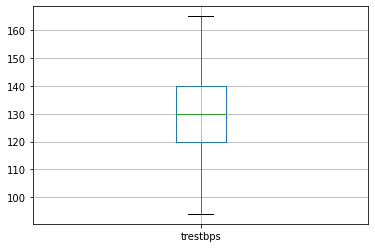

In [130]:
da.boxplot(column="trestbps")

In [83]:
# splitting the Data set Training set And Testing set

In [84]:
x=da.drop('target',axis=1)

In [85]:
y=da["target"]

In [86]:
from sklearn.model_selection import train_test_split

In [88]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [131]:
x_train.shape,x_test.shape

((241, 13), (61, 13))

In [132]:
y_train.shape,y_test.shape

((241,), (61,))

# Logistic Regression 

In [90]:
da.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.949794,1,3,0.764066,-0.261285,1,0,0.018826,0,1.084022,0,0,1,1
1,-1.928548,1,2,-0.091401,0.067741,0,1,1.636979,0,2.118926,0,0,2,1
2,-1.485726,0,1,-0.091401,-0.822564,0,0,0.980971,0,0.307844,2,0,2,1
3,0.174856,1,1,-0.661712,-0.203222,0,1,1.243374,0,-0.209608,2,0,2,1
4,0.285561,0,0,-0.661712,2.080602,0,1,0.587366,1,-0.382092,2,0,2,1


In [ ]:
# target variable are binary responses  are categarical problem  0 and 1 person as no heart desease or heart desease

In [92]:
from sklearn.linear_model import  LogisticRegression

In [93]:
model=LogisticRegression()

In [94]:
model

LogisticRegression()

In [96]:
model.fit(x_train,y_train)

LogisticRegression()

In [97]:
pred=model.predict(x_test)

In [98]:
pred

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [134]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [101]:
accuracy_score(y_test,pred)

0.8360655737704918

In [103]:
confusion_matrix(y_test,pred)

array([[25,  4],
       [ 6, 26]], dtype=int64)

In [104]:
(25+26)/(25+4+6+26)

0.8360655737704918

In [135]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



# from LogisticRegrssion model the accuracy_score is 83.60%¶

# support vector machine

In [137]:
from sklearn.svm import SVC

In [198]:
model=SVC()

In [139]:
model

SVC()

In [140]:
model=model.fit(x_train,y_train)

In [141]:
model

SVC()

In [145]:
pred1=model.predict(x_test)

In [146]:
pred1

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [147]:
accuracy_score(y_test,pred1)

0.8852459016393442

In [148]:
confusion_matrix(y_test,pred1)

array([[25,  4],
       [ 3, 29]], dtype=int64)

In [149]:
(25+29)/(25+4+3+29)

0.8852459016393442

# from Support Vector Classification  model the accuracy_score is 88.52%

# naive Bayes algorithm

In [150]:
from sklearn.naive_bayes import GaussianNB
NBClassifier=GaussianNB()
NBClassifier.fit(x_train,y_train)

GaussianNB()

In [151]:
pred2=NBClassifier.predict(x_test)

In [152]:
pred2

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [153]:
accuracy_score(y_test,pred2)

0.8852459016393442

In [154]:
confusion_matrix(y_test,pred2)

array([[27,  2],
       [ 5, 27]], dtype=int64)

In [155]:
(27+27)/(27+2+5+27)

0.8852459016393442

# from Naive Bayes Classification  model the accuracy_score is 88.52%

# Decision Tree Classifier¶

In [156]:
from sklearn.tree import DecisionTreeClassifier

In [157]:
model=DecisionTreeClassifier()

In [158]:
model=model.fit(x_train,y_train)

In [159]:
model

DecisionTreeClassifier()

In [160]:
pred3=model.predict(x_test)

In [161]:
pred3

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [162]:
accuracy_score(y_test,pred3)

0.7704918032786885

In [163]:
confusion_matrix(y_test,pred3)

array([[25,  4],
       [10, 22]], dtype=int64)

In [164]:
(25+22)/(25+4+10+22)

0.7704918032786885

# from Decision Tree Classifier model the accuracy_score is 77.04%

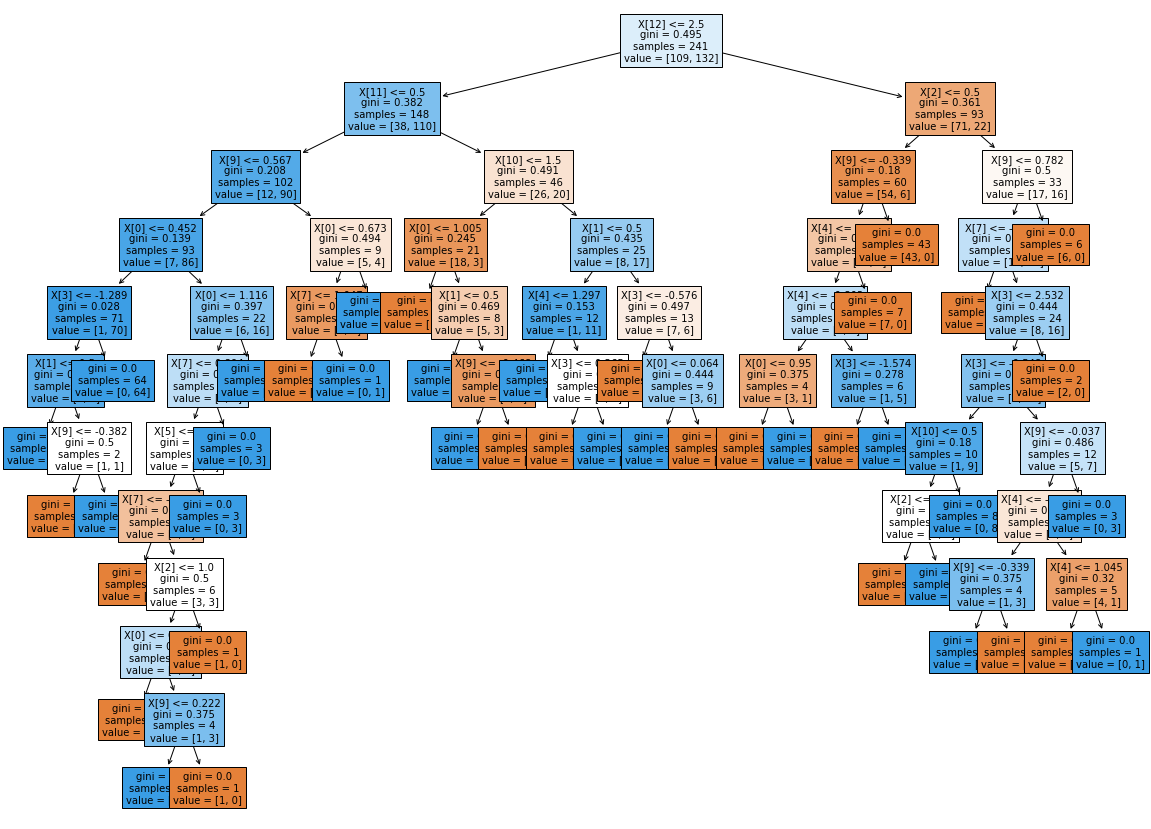

In [165]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,15))
from sklearn import tree
tr = tree.plot_tree(model,filled=True,fontsize=10)

# random forest classifier

In [166]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [167]:
model=RandomForestClassifier()

In [168]:
model

RandomForestClassifier()

In [170]:
model=model.fit(x_train,y_train)

In [171]:
model

RandomForestClassifier()

In [172]:
pred4=model.predict(x_test)

In [173]:
pred4


array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [174]:
accuracy_score(y_test,pred4)

0.8688524590163934

In [175]:
confusion_matrix(y_test,pred4)

array([[25,  4],
       [ 4, 28]], dtype=int64)

In [176]:
(25+28)/(25+4+4+28)

0.8688524590163934

# from Random forest  model the accuracy_score is 86.89%

# GradientBoostingClassifier

In [177]:
model=GradientBoostingClassifier()

In [179]:
model=model.fit(x_train,y_train)

In [180]:
model

GradientBoostingClassifier()

In [181]:
pred5=model.predict(x_test)

In [182]:
pred5

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [184]:
accuracy_score(y_test,pred5)

0.8524590163934426

# from Gradiant Boosting Classifier model the accuracy_score is 85.24%

In [188]:
final_da=pd.DataFrame({"Models":["LR","SVM","Naive Bayes","DT","RF","GB"],
                      "ACC":[accuracy_score(y_test,pred),
                            accuracy_score(y_test,pred1),
                            accuracy_score(y_test,pred2),
                            accuracy_score(y_test,pred3),
                            accuracy_score(y_test,pred4),
                            accuracy_score(y_test,pred5),]})

In [189]:
final_da

,Models,ACC
0,LR,0.836066
1,SVM,0.885246
2,Naive Bayes,0.885246
3,DT,0.770492
4,RF,0.868852
5,GB,0.852459


In [191]:
import seaborn as sns

C:\Users\Akash\Downloads\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='ACC'>

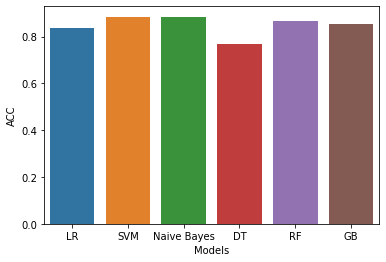

In [192]:
sns.barplot(final_da["Models"],final_da["ACC"])

In [194]:
x=da.drop("target",axis=1)
y=da["target"]

In [195]:
x.shape

(282, 13)

In [196]:
from sklearn.svm import SVC

In [199]:
SVM=SVC()

In [200]:
SVM.fit(x,y)

SVC()

In [201]:
import pandas as pd

In [212]:
new_data=pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
    'slope':2,
    'ca':2,
    'thal':3,
},index=[0])

In [213]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [214]:
p=SVM.predict(new_data)
if p[0]==0:
    print("No  Disease")
else:
    print("Heart Disease")

Heart Disease
